In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### DataCollection

In [2]:
from data_collection_and_cleaning import DataCollection

collection = DataCollection()

In [3]:
#Read data
original_df = collection.data_readcsv("datas/bank-additional-full.csv")

original_df.sample(10)

age           job   marital            education  default  housing  \
13523   36   blue-collar   married             basic.9y  unknown       no   
2249    51  entrepreneur  divorced              unknown       no      yes   
38739   45        admin.   married    university.degree       no       no   
14280   36        admin.    single          high.school  unknown      yes   
11740   36        admin.   married    university.degree       no  unknown   
315     34        admin.    single             basic.9y  unknown       no   
22777   35    management  divorced    university.degree       no       no   
15291   37        admin.    single    university.degree       no       no   
13537   56        admin.   married             basic.4y  unknown      yes   
23730   40    technician   married  professional.course       no      yes   

          loan    contact month day_of_week  ...  campaign  pdays  previous  \
13523       no   cellular   jul         thu  ...         1    999         0   
2249        no  telephone   may         tue  ...         6    999         0   
38739      yes   cellular   nov         wed  ...         1    999         1   
14280      yes   cellular   jul         mon  ...         5    999         0   
11740  unknown  telephone   jun         fri  ...         2    999         0   
315         no  telephone   may         mon  ...         2    999         0   
22777       no   cellular   aug         mon  ...         7    999         0   
15291       no   cellular   jul         thu  ...         6    999         0   
13537       no   cellular   jul         thu  ...         1    999         0   
23730       no   cellular   aug         thu  ...         8    999         0   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
13523  nonexistent          1.4          93.918          -42.7      4.963   
2249   nonexistent          1.1          93.994          -36.4      4.856   
38739      failure         -3.4          92.649          -30.1      0.715   
14280  nonexistent          1.4          93.918          -42.7      4.962   
11740  nonexistent          1.4          94.465          -41.8      4.959   
315    nonexistent          1.1          93.994          -36.4      4.857   
22777  nonexistent          1.4          93.444          -36.1      4.965   
15291  nonexistent          1.4          93.918          -42.7      4.958   
13537  nonexistent          1.4          93.918          -42.7      4.963   
23730  nonexistent          1.4          93.444          -36.1      4.962   

       nr.employed  deposit  
13523       5228.1       no  
2249        5191.0       no  
38739       5017.5       no  
14280       5228.1       no  
11740       5228.1       no  
315         5191.0       no  
22777       5228.1       no  
15291       5228.1       no  
13537       5228.1       no  
23730       5228.1       no  

[10 rows x 21 columns]

In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# unique values in object type
collection.unique_values_dtypes(original_df,'object')

{'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 'default': array(['no', 'unknown', 'yes'], dtype=object),
 'housing': array(['no', 'yes', 'unknown'], dtype=object),
 'loan': array(['no', 'yes', 'unknown'], dtype=object),
 'contact': array(['telephone', 'cellular'], dtype=object),
 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
        'sep'], dtype=object),
 'day_of_week': array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object),
 'poutcome': array(['nonexistent', 'failure', 'success'], dtype=object),
 'deposit': array(['no', 'yes'], dtype=object)}

In [6]:
#this function return tuple df with message
result= collection.check_duplication(original_df)
print(result.message)
df = result.dataframe

Deleted Duplicates: 12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

### DataCleaning

In [8]:
from data_collection_and_cleaning import DataCleaning

cleaning = DataCleaning(df)


In [9]:
unknown_result = cleaning.find_key_columns('unknown')

# print unknown columns and freq
unknown_columns = []
for col, freq_df in unknown_result.items():
    print(f"Column: {col}")
    unknown_columns.append(col)
    print(freq_df)
    print('\n')

Column: job
              job  Frequency
0          admin.   0.253036
1     blue-collar   0.224718
2    entrepreneur   0.035360
3       housemaid   0.025743
4      management   0.071012
5         retired   0.041723
6   self-employed   0.034510
7        services   0.096343
8         student   0.021250
9      technician   0.163663
10     unemployed   0.024626
11        unknown   0.008014


Column: marital
    marital  Frequency
0  divorced   0.111983
1   married   0.605231
2    single   0.280843
3   unknown   0.001943


Column: education
             education  Frequency
0             basic.4y   0.101418
1             basic.6y   0.055639
2             basic.9y   0.146809
3          high.school   0.231008
4           illiterate   0.000437
5  professional.course   0.127259
6    university.degree   0.295415
7              unknown   0.042015


Column: default
   default  Frequency
0       no   0.791165
1  unknown   0.208762
2      yes   0.000073


Column: housing
   housing  Frequency
0     

In [10]:
# Clean Data for unknown label
df = cleaning.fill_missing_with_mode(unknown_columns,'unknown')
df

age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
1       57     services  married          high.school      no      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  deposit  
0           5191.0       no  
1           5191.0       no  
2           5191.0       no  
3           5191.0       no  
4           5191.0       no  
...            ...      ...  
41183       4963.6      yes  
41184       4963.6       no  
41185       4963.6       no  
41186       4963.6      yes  
41187       4963.6       no  

[41176 rows x 21 columns]

### EDA

In [11]:
from exploratory_data_analysis import EDA

eda = EDA(df)


In [12]:
#Finding categorical columns to see for encoding informations
categ_features = eda.find_categorical_unique_features(target_column='deposit')
categ_features

Feature Unique Categories
0          job                11
1      marital                 3
2    education                 7
3      default                 2
4      housing                 2
5         loan                 2
6      contact                 2
7        month                10
8  day_of_week                 5
9     poutcome                 3

In [13]:
#Describle categorical columns
eda.find_categorical_describle(categ_columns=df[categ_features['Feature']])

count unique                top   freq
job          41176     11             admin.  10749
marital      41176      3            married  25001
education    41176      7  university.degree  13894
default      41176      2                 no  41173
housing      41176      2                yes  22561
loan         41176      2                 no  34928
contact      41176      2           cellular  26135
month        41176     10                may  13767
day_of_week  41176      5                thu   8618
poutcome     41176      3        nonexistent  35551

In [14]:
#Finding categorical columns
numeric_features = eda.find_numeric_features_list()

In [15]:
#Describle numeric columns
eda.find_numeric_describle(numeric_columns = df[numeric_features])

count         mean         std       min       25%  \
age             41176.0    40.023800   10.420680    17.000    32.000   
duration        41176.0   258.315815  259.305321     0.000   102.000   
campaign        41176.0     2.567879    2.770318     1.000     1.000   
pdays           41176.0   962.464810  186.937102     0.000   999.000   
previous        41176.0     0.173013    0.494964     0.000     0.000   
emp.var.rate    41176.0     0.081922    1.570883    -3.400    -1.800   
cons.price.idx  41176.0    93.575720    0.578839    92.201    93.075   
cons.conf.idx   41176.0   -40.502863    4.627860   -50.800   -42.700   
euribor3m       41176.0     3.621293    1.734437     0.634     1.344   
nr.employed     41176.0  5167.034870   72.251364  4963.600  5099.100   

                     50%       75%       max  
age               38.000    47.000    98.000  
duration         180.000   319.000  4918.000  
campaign           2.000     3.000    56.000  
pdays            999.000   999.000   999.000  
previous           0.000     0.000     7.000  
emp.var.rate       1.100     1.400     1.400  
cons.price.idx    93.749    93.994    94.767  
cons.conf.idx    -41.800   -36.400   -26.900  
euribor3m          4.857     4.961     5.045  
nr.employed     5191.000  5228.100  5228.100

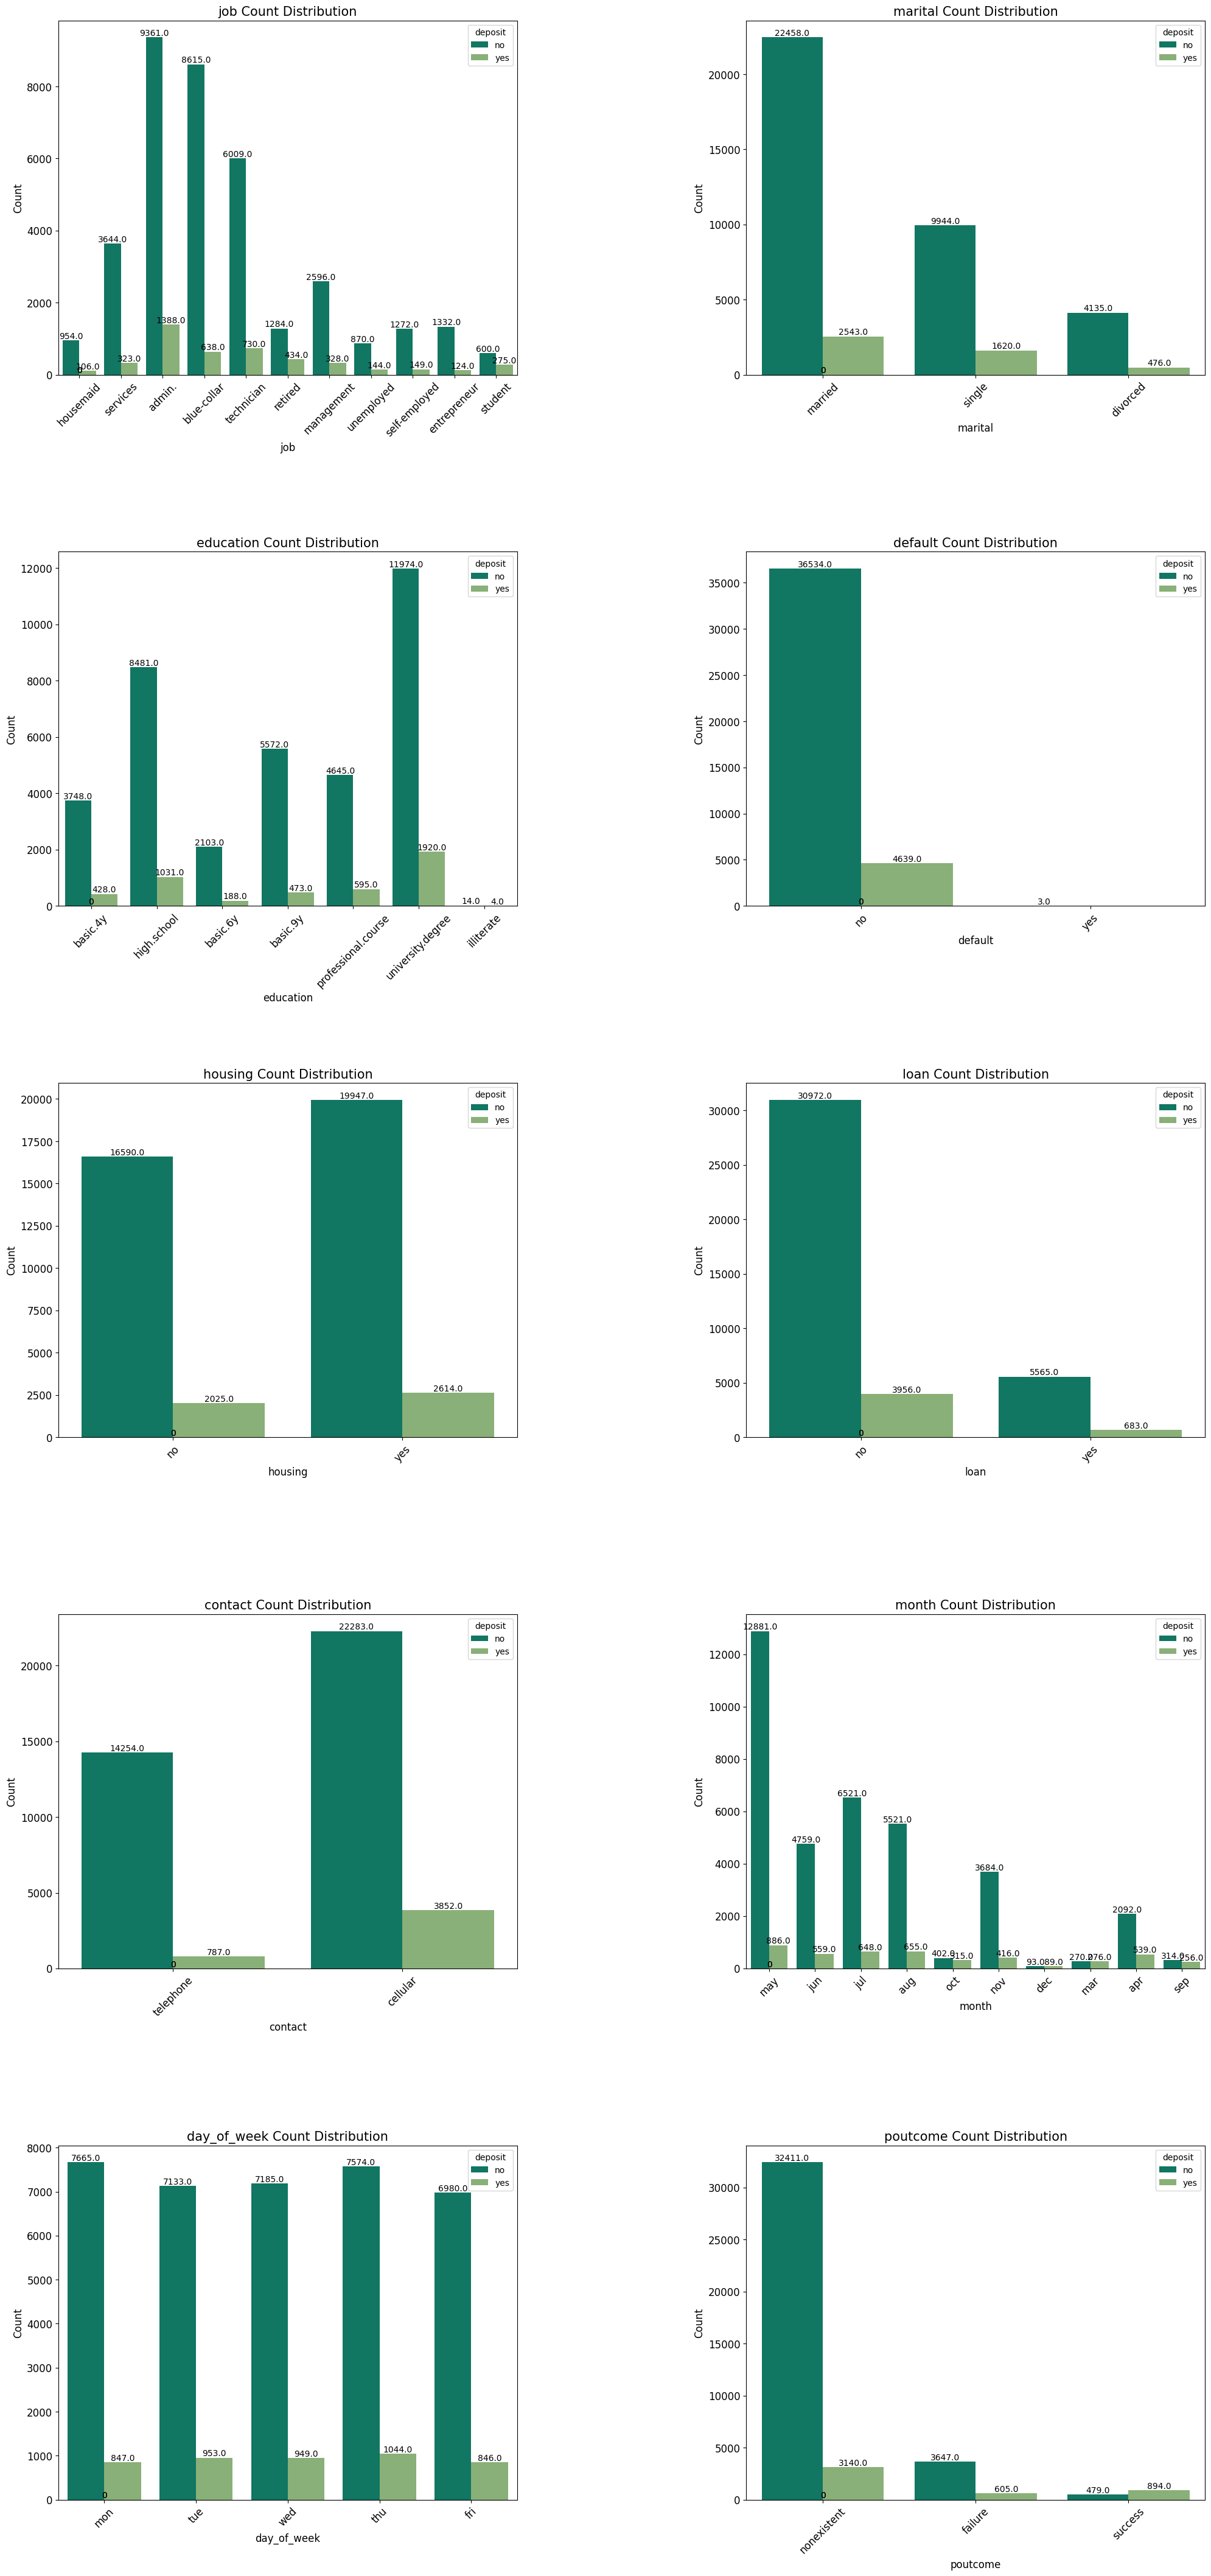

In [16]:
eda.countplot_categorical(categ_features['Feature'],hue_column = 'deposit')

d:\WorkSpace\MLBankMarketing\exploratory_data_analysis.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = self.df,
d:\WorkSpace\MLBankMarketing\exploratory_data_analysis.py:114: UserWarning: 
The palette list has fewer values (1) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data = self.df,
d:\WorkSpace\MLBankMarketing\exploratory_data_analysis.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = self.df,
d:\WorkSpace\MLBankMarketing\exploratory_data_analysis.py:114: UserWarning: 
The palette list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data = self.df,
d:\Work

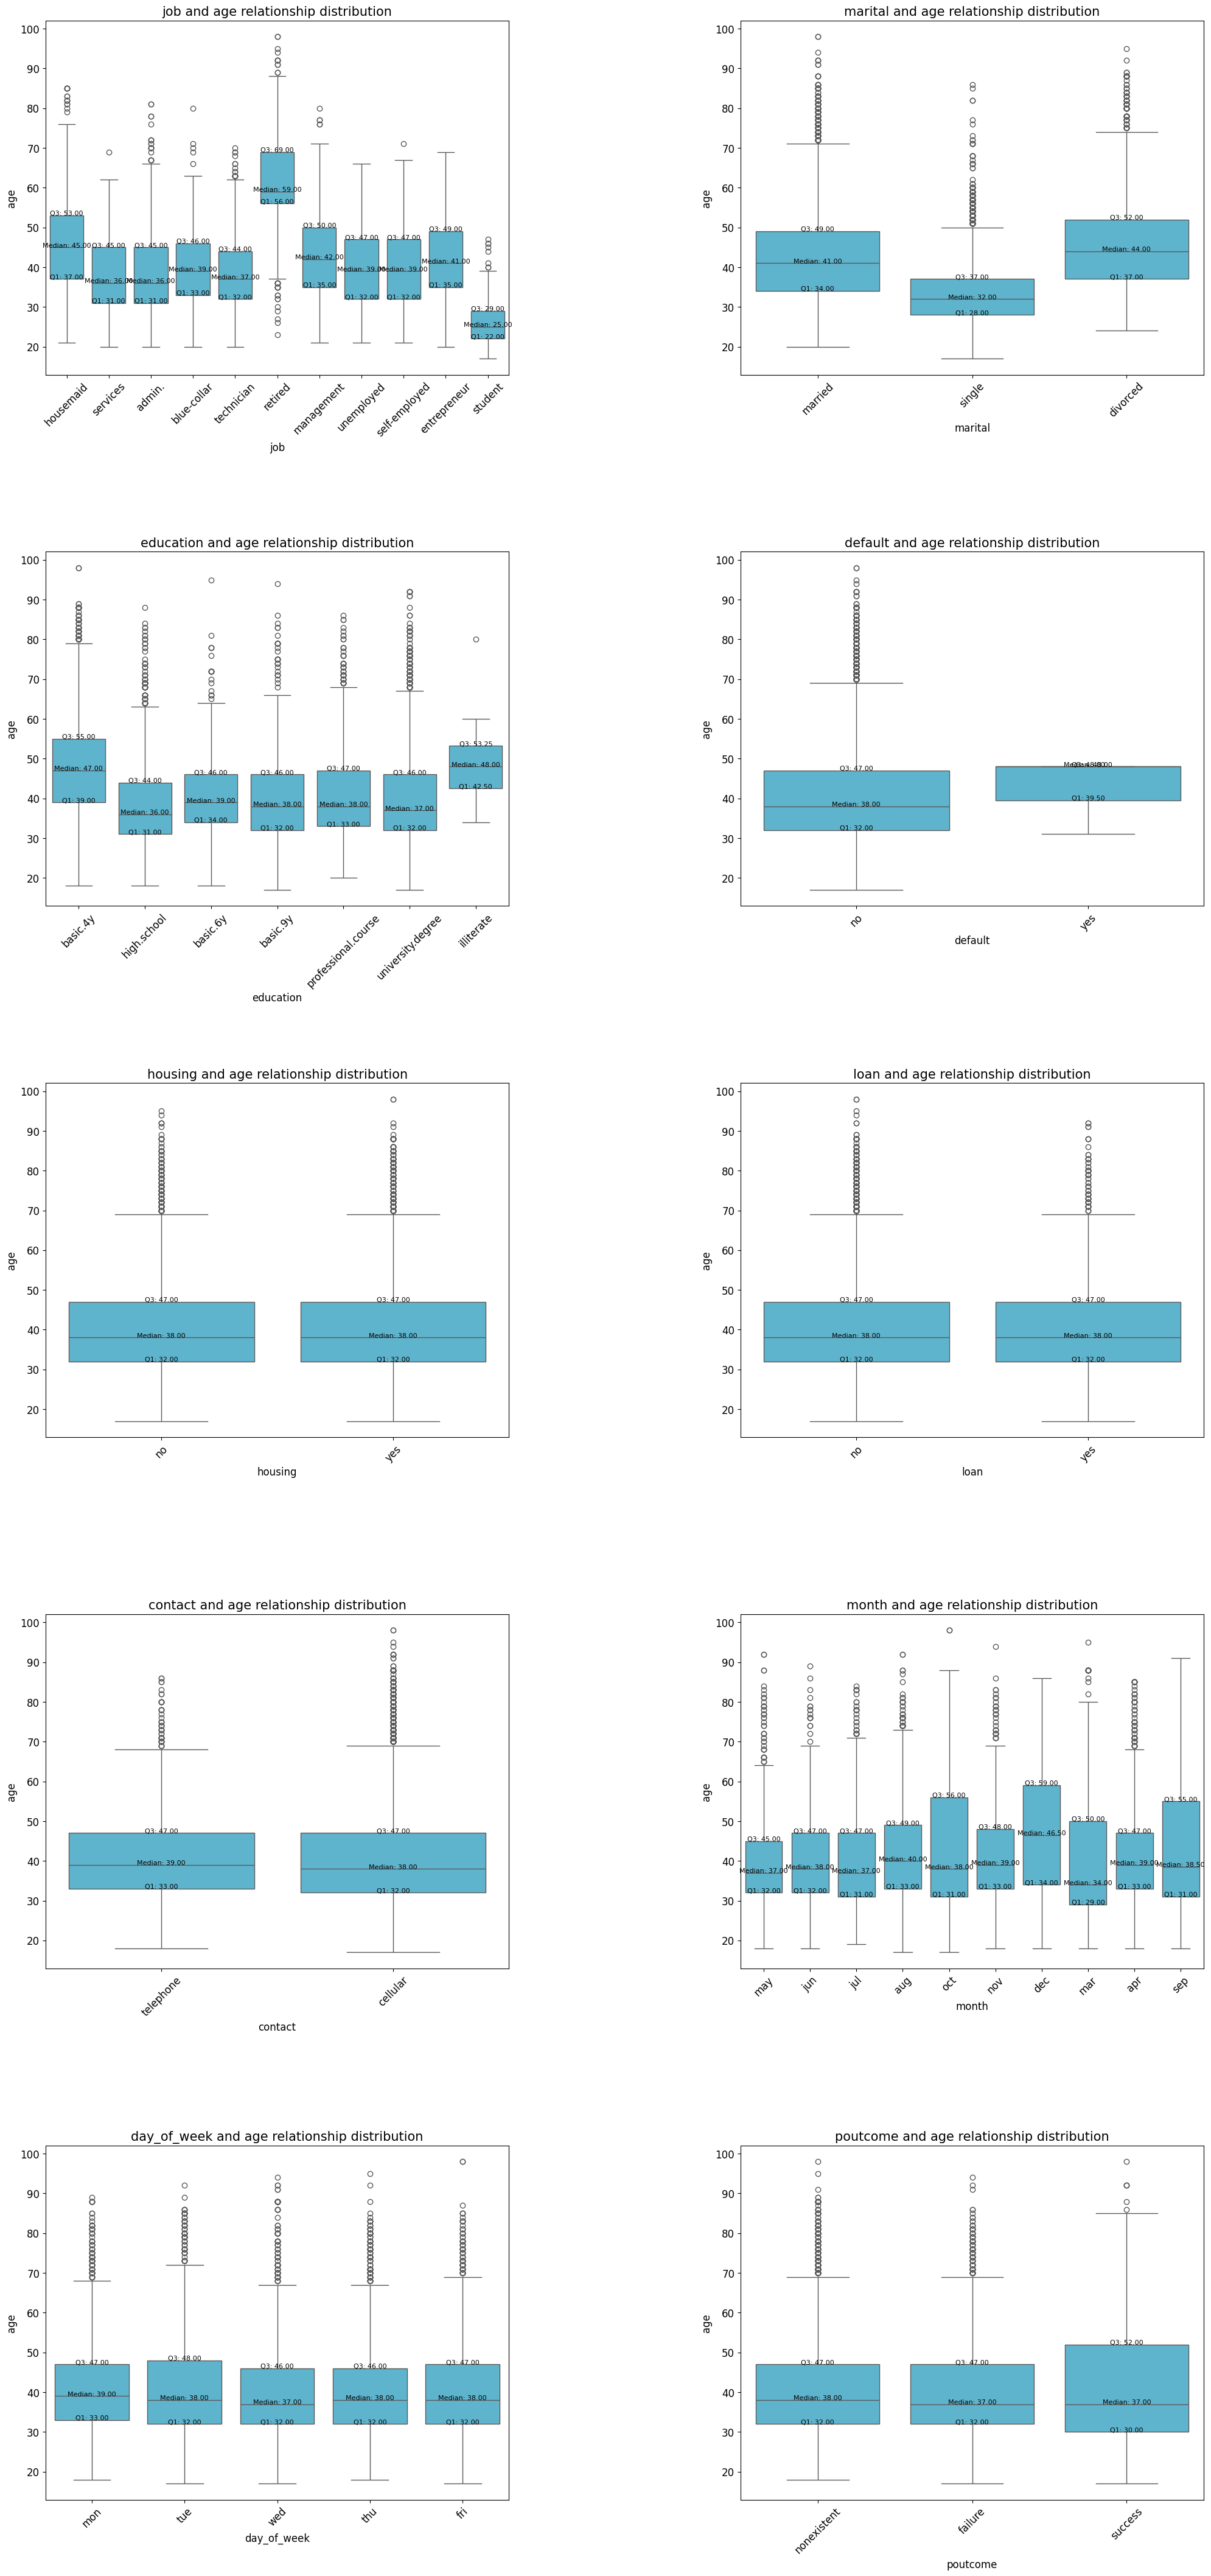

In [17]:
eda.boxplot_categorical_relationship(categ_features['Feature'],'age')

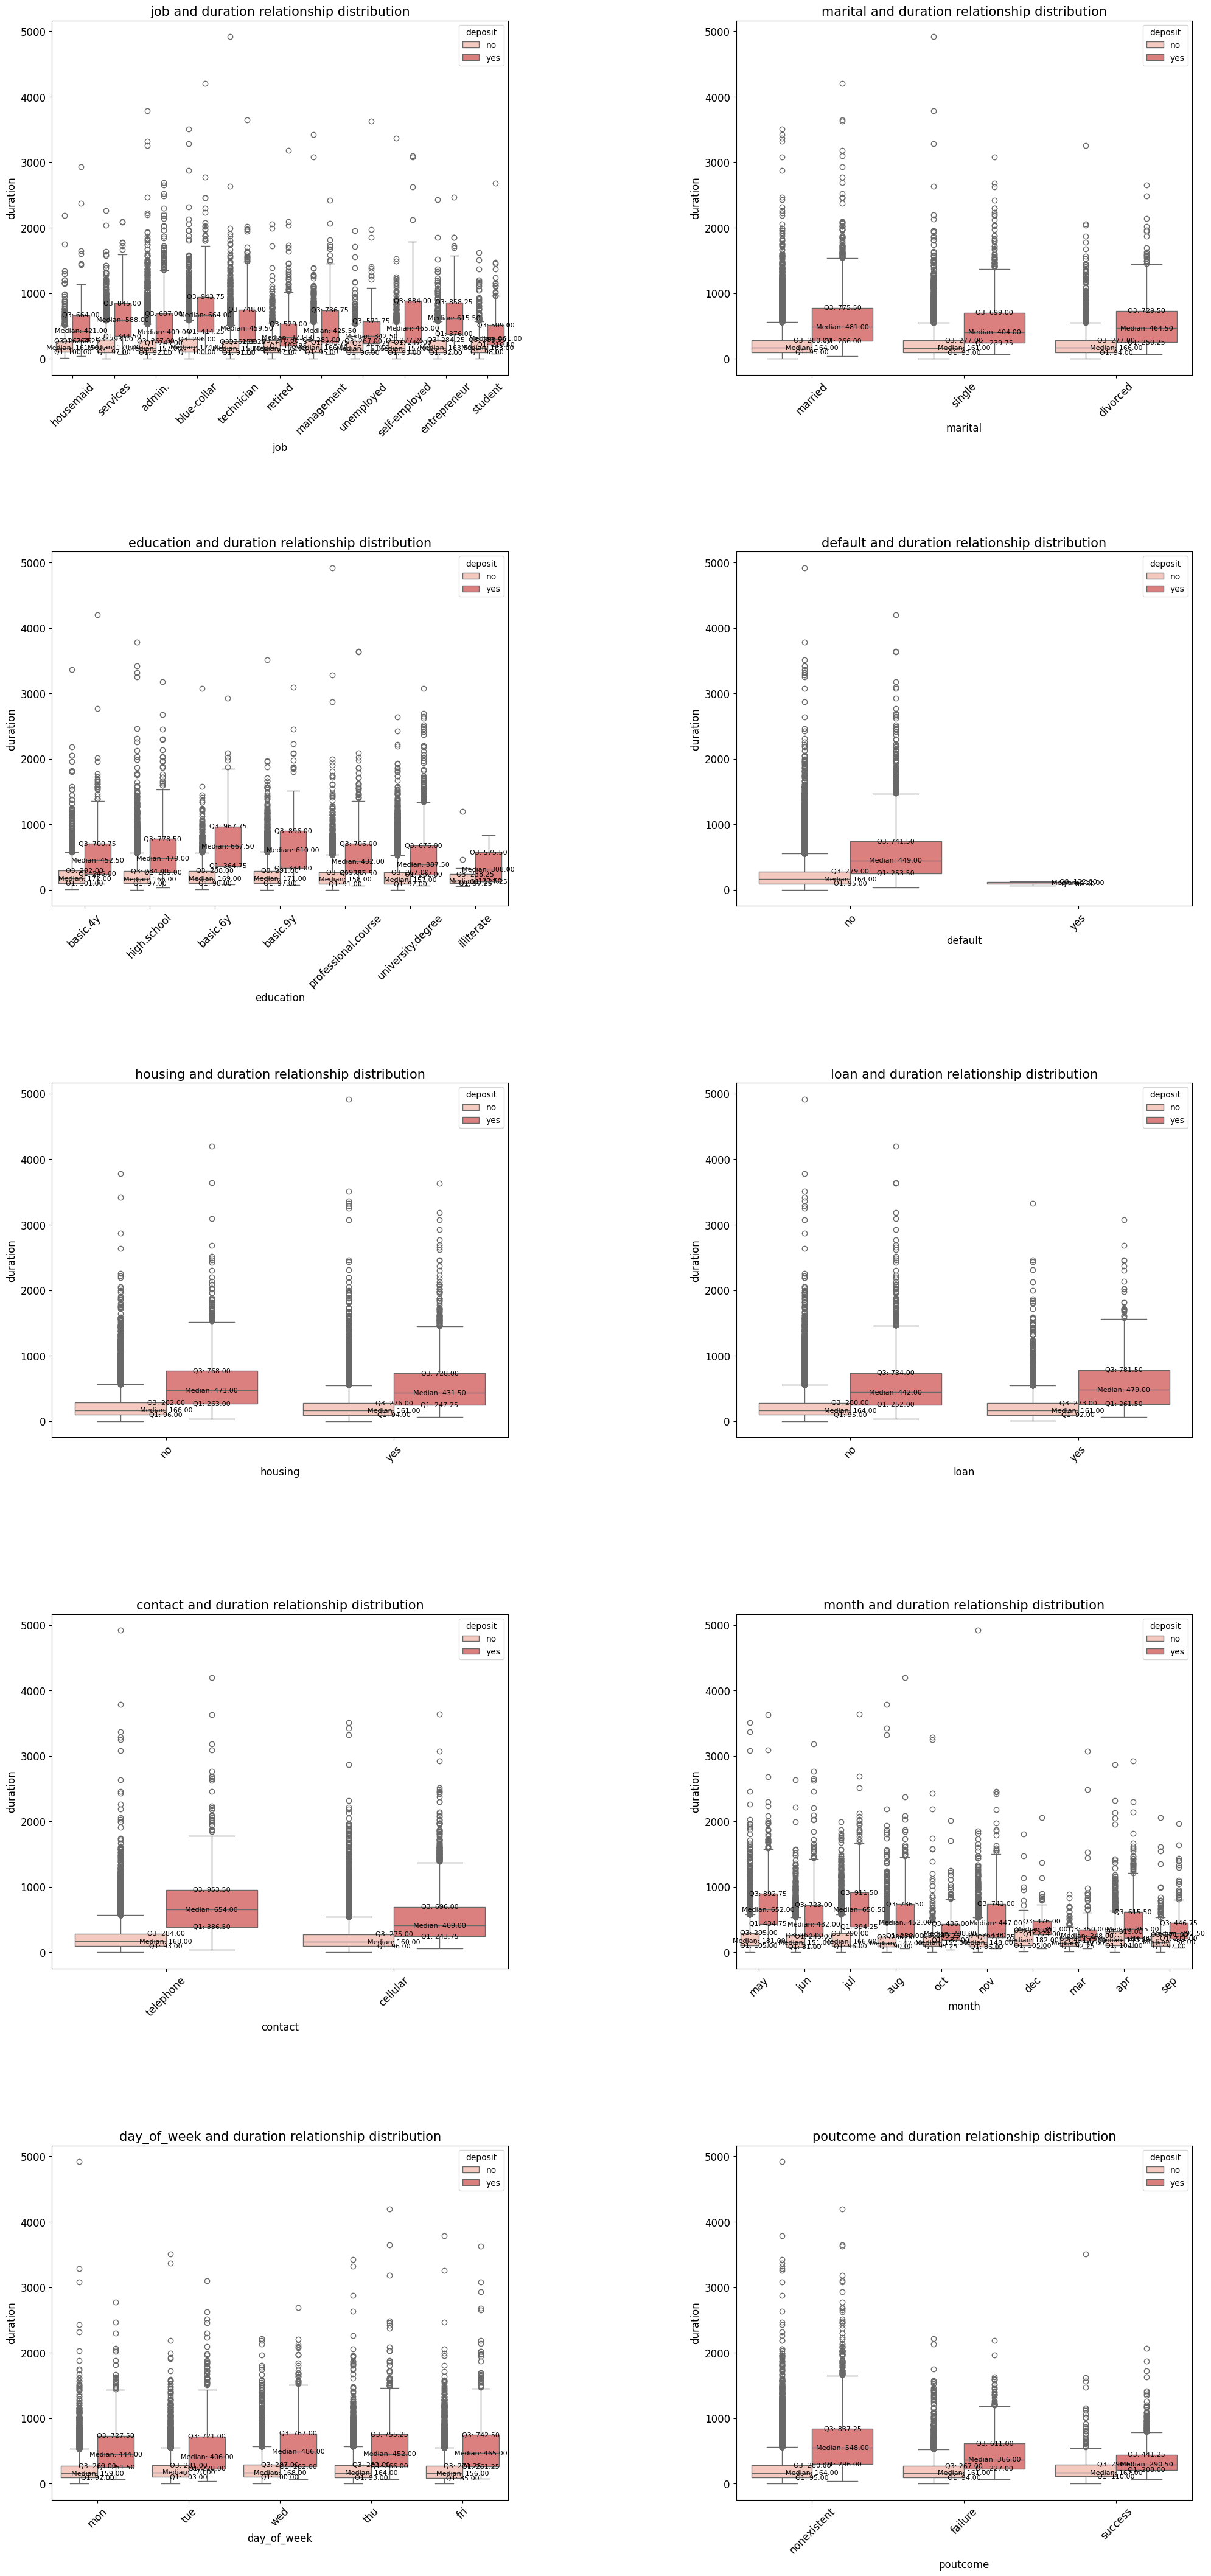

In [18]:
eda.boxplot_categorical_relationship(categ_features['Feature'],'duration',hue_column='deposit')

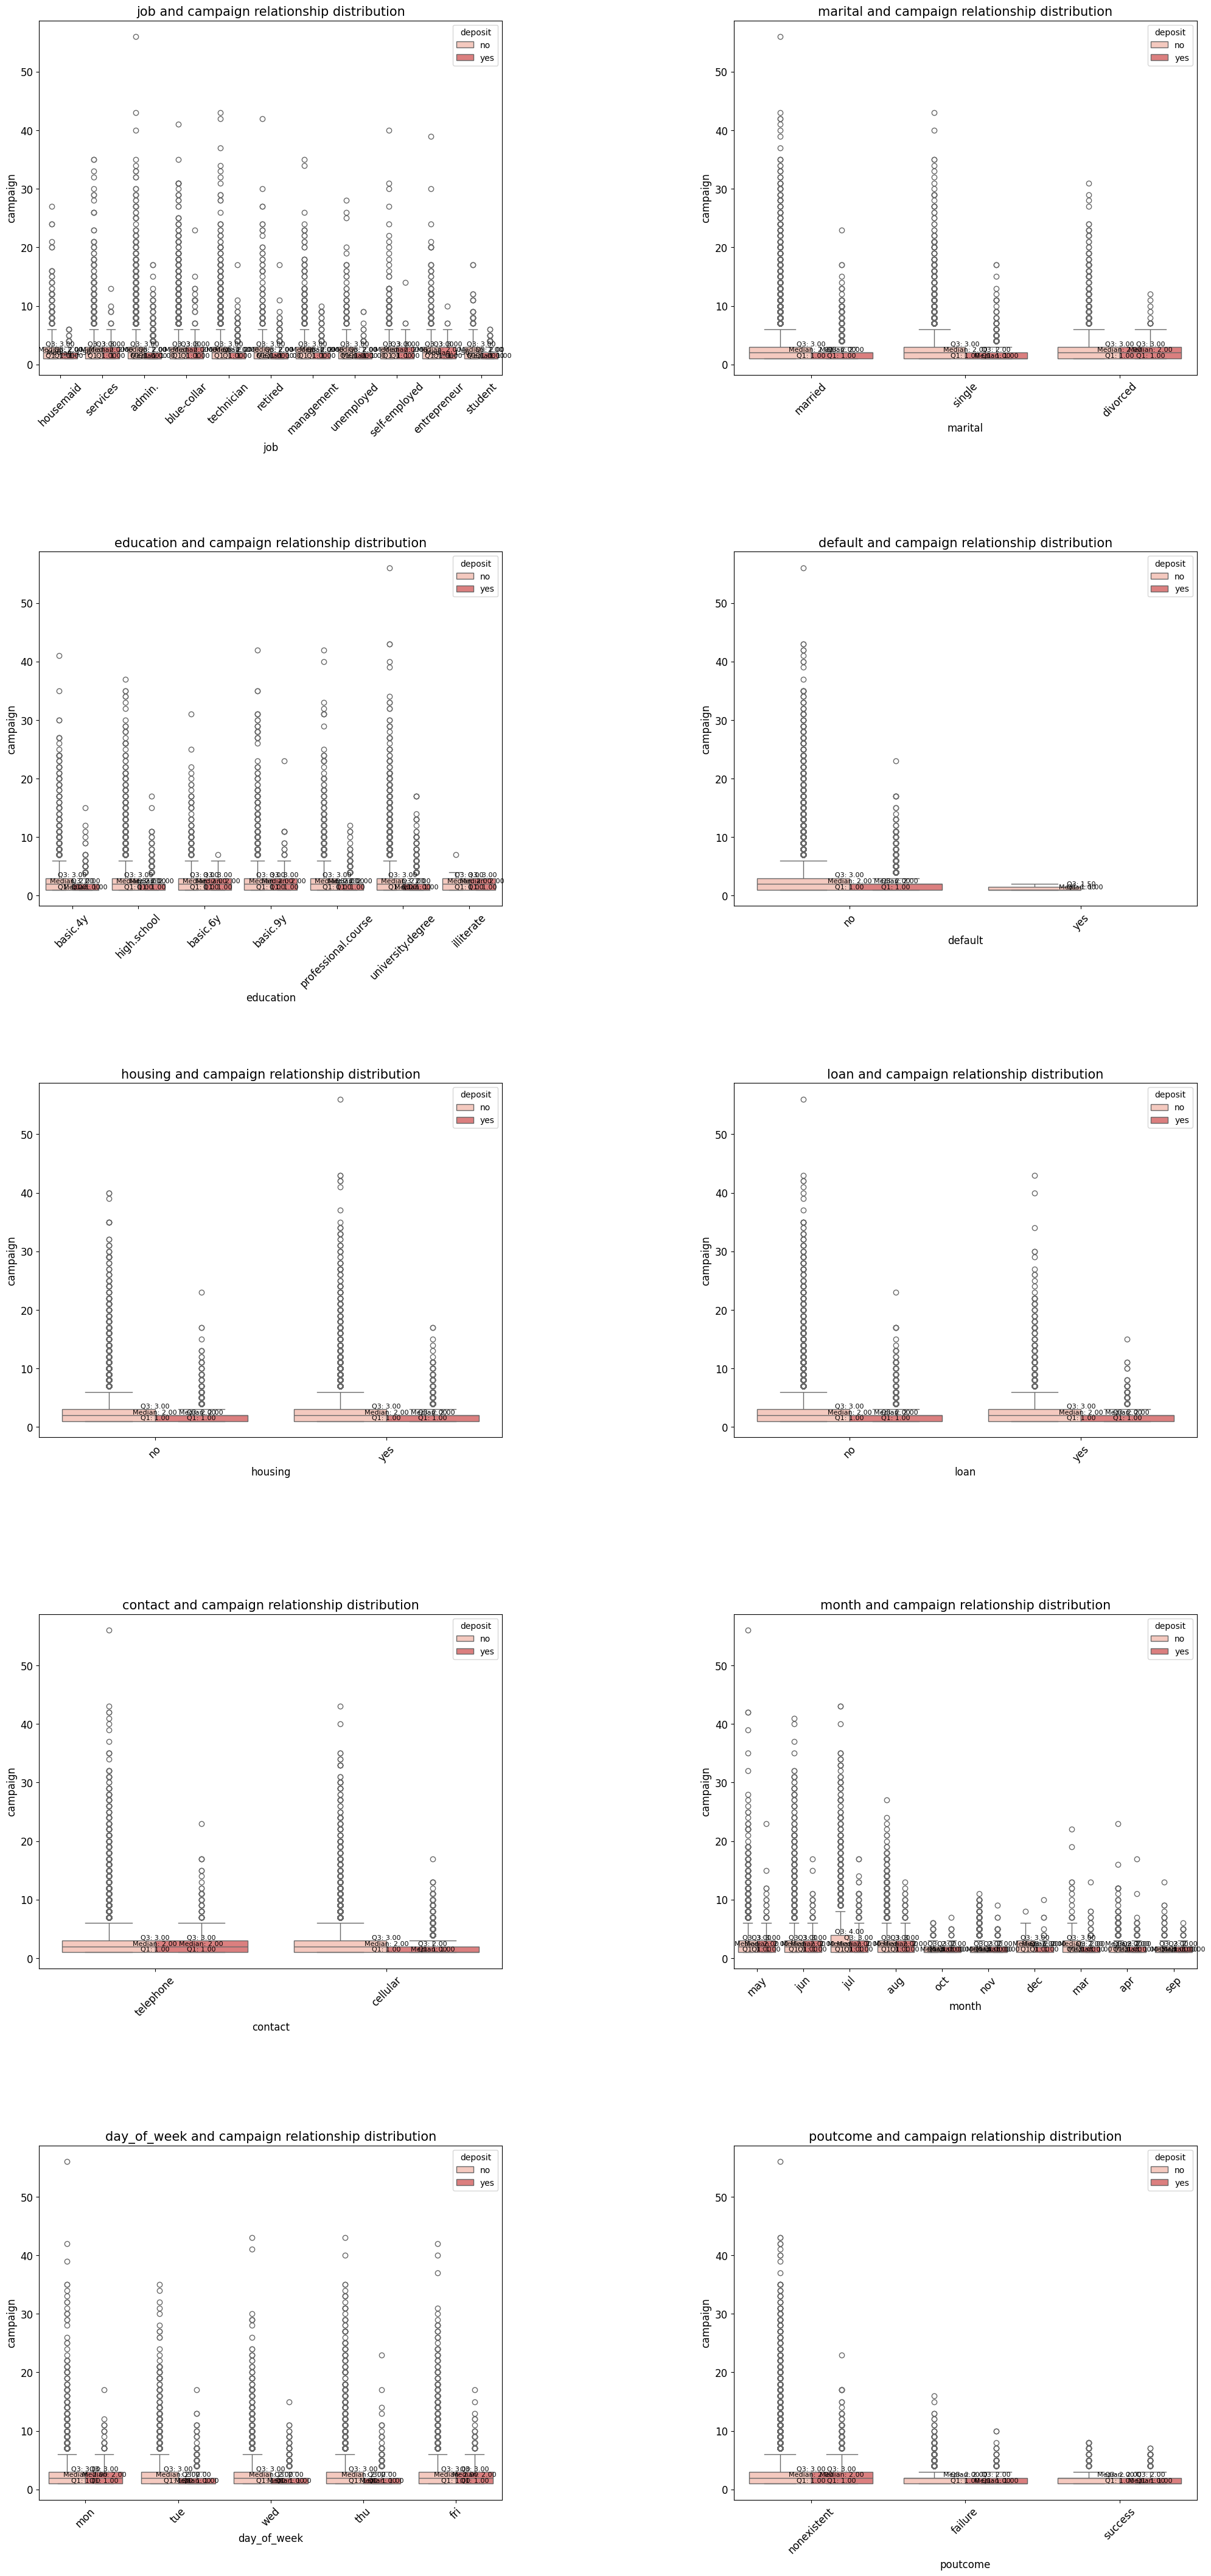

In [19]:
eda.boxplot_categorical_relationship(categ_features['Feature'],'campaign',hue_column='deposit')

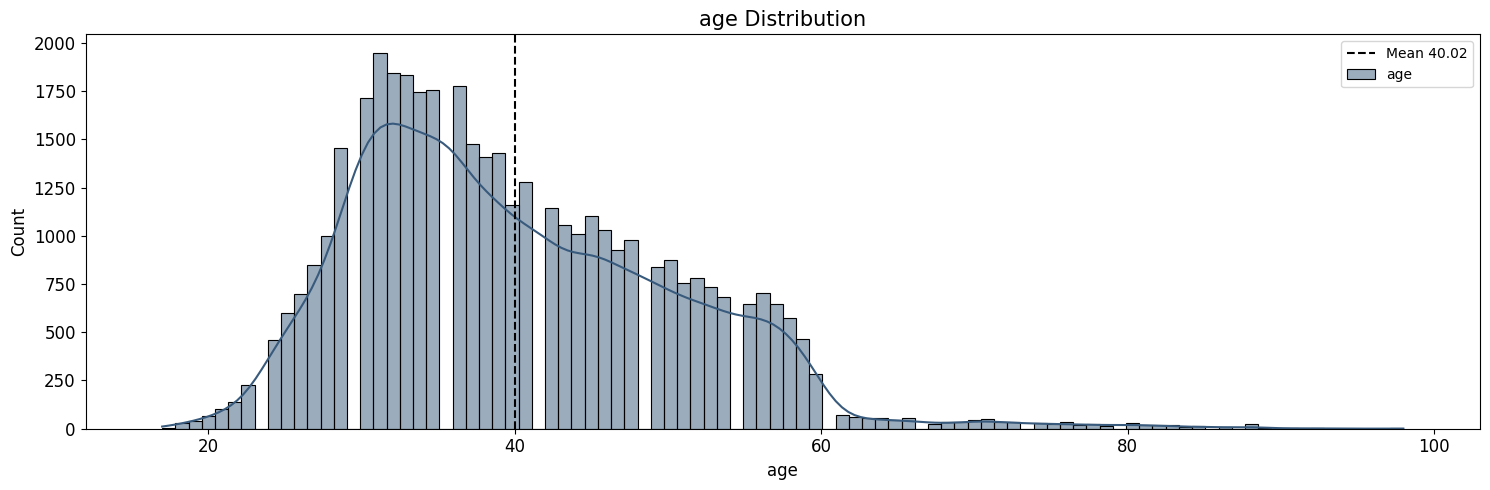

In [20]:
eda.histplot_numeric(df[numeric_features].iloc[:,0:1].columns)

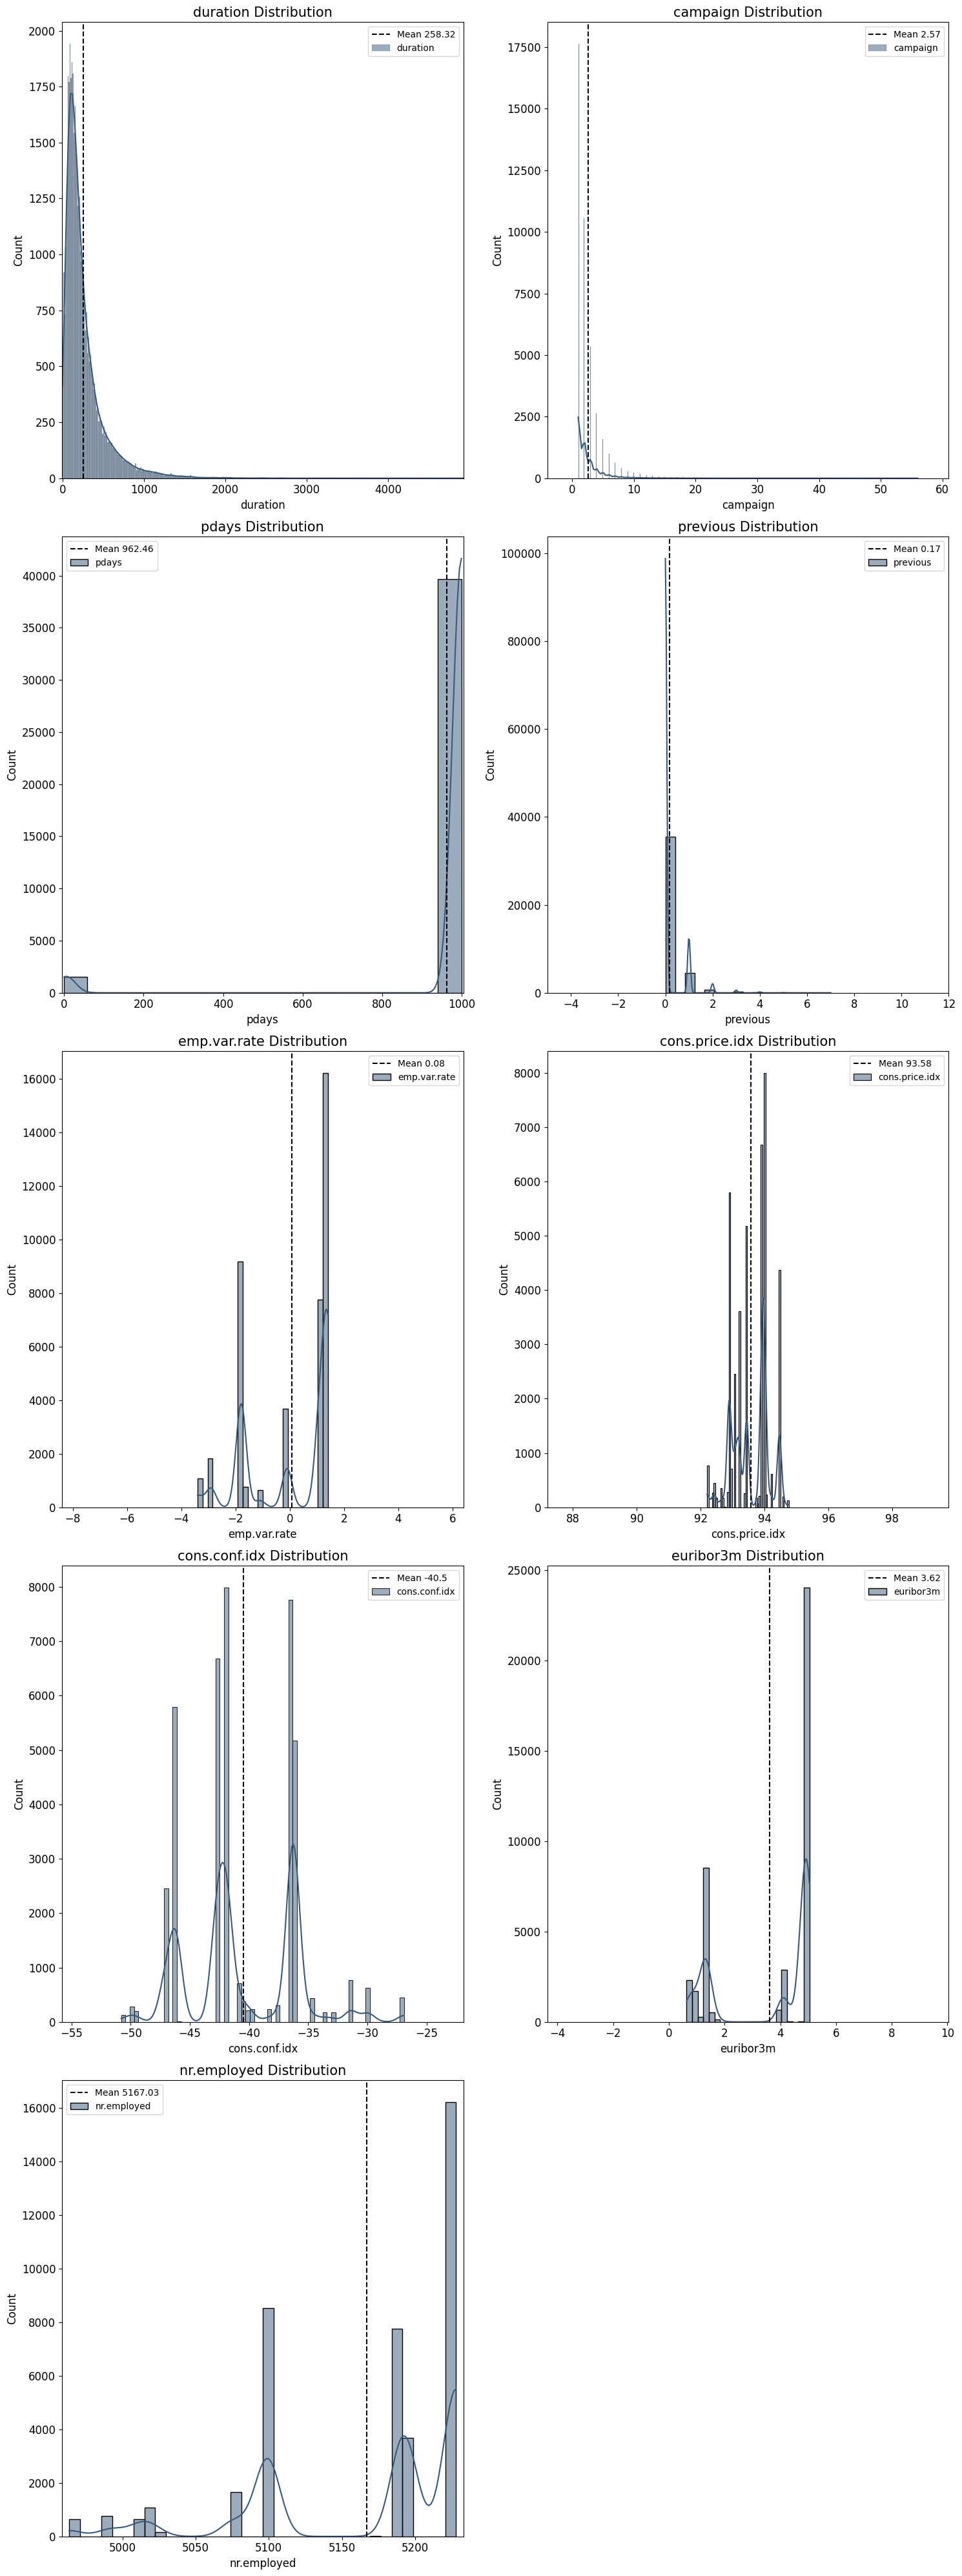

In [21]:
eda.histplot_numeric(df[numeric_features].iloc[:,1:].columns,figsize=(15,40))

### Label Encoding

In [22]:
categ_full_features = eda.find_categorical_unique_features().reset_index(drop=True)
categ_full_features

Feature Unique Categories
0           job                11
1       marital                 3
2     education                 7
3       default                 2
4       housing                 2
5          loan                 2
6       contact                 2
7         month                10
8   day_of_week                 5
9      poutcome                 3
10      deposit                 2

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for feature in categ_full_features['Feature']:
    df[feature] = le.fit_transform(df[feature])

df.head(5)

age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        0        0     0        1      6   
2   37    7        1          3        0        1     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     1        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...         1    999         0         1           1.1   
1            1  ...         1    999         0         1           1.1   
2            1  ...         1    999         0         1           1.1   
3            1  ...         1    999         0         1           1.1   
4            1  ...         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  deposit  
0          93.994          -36.4      4.857       5191.0        0  
1          93.994          -36.4      4.857       5191.0        0  
2          93.994          -36.4      4.857       5191.0        0  
3          93.994          -36.4      4.857       5191.0        0  
4          93.994          -36.4      4.857       5191.0        0  

[5 rows x 21 columns]

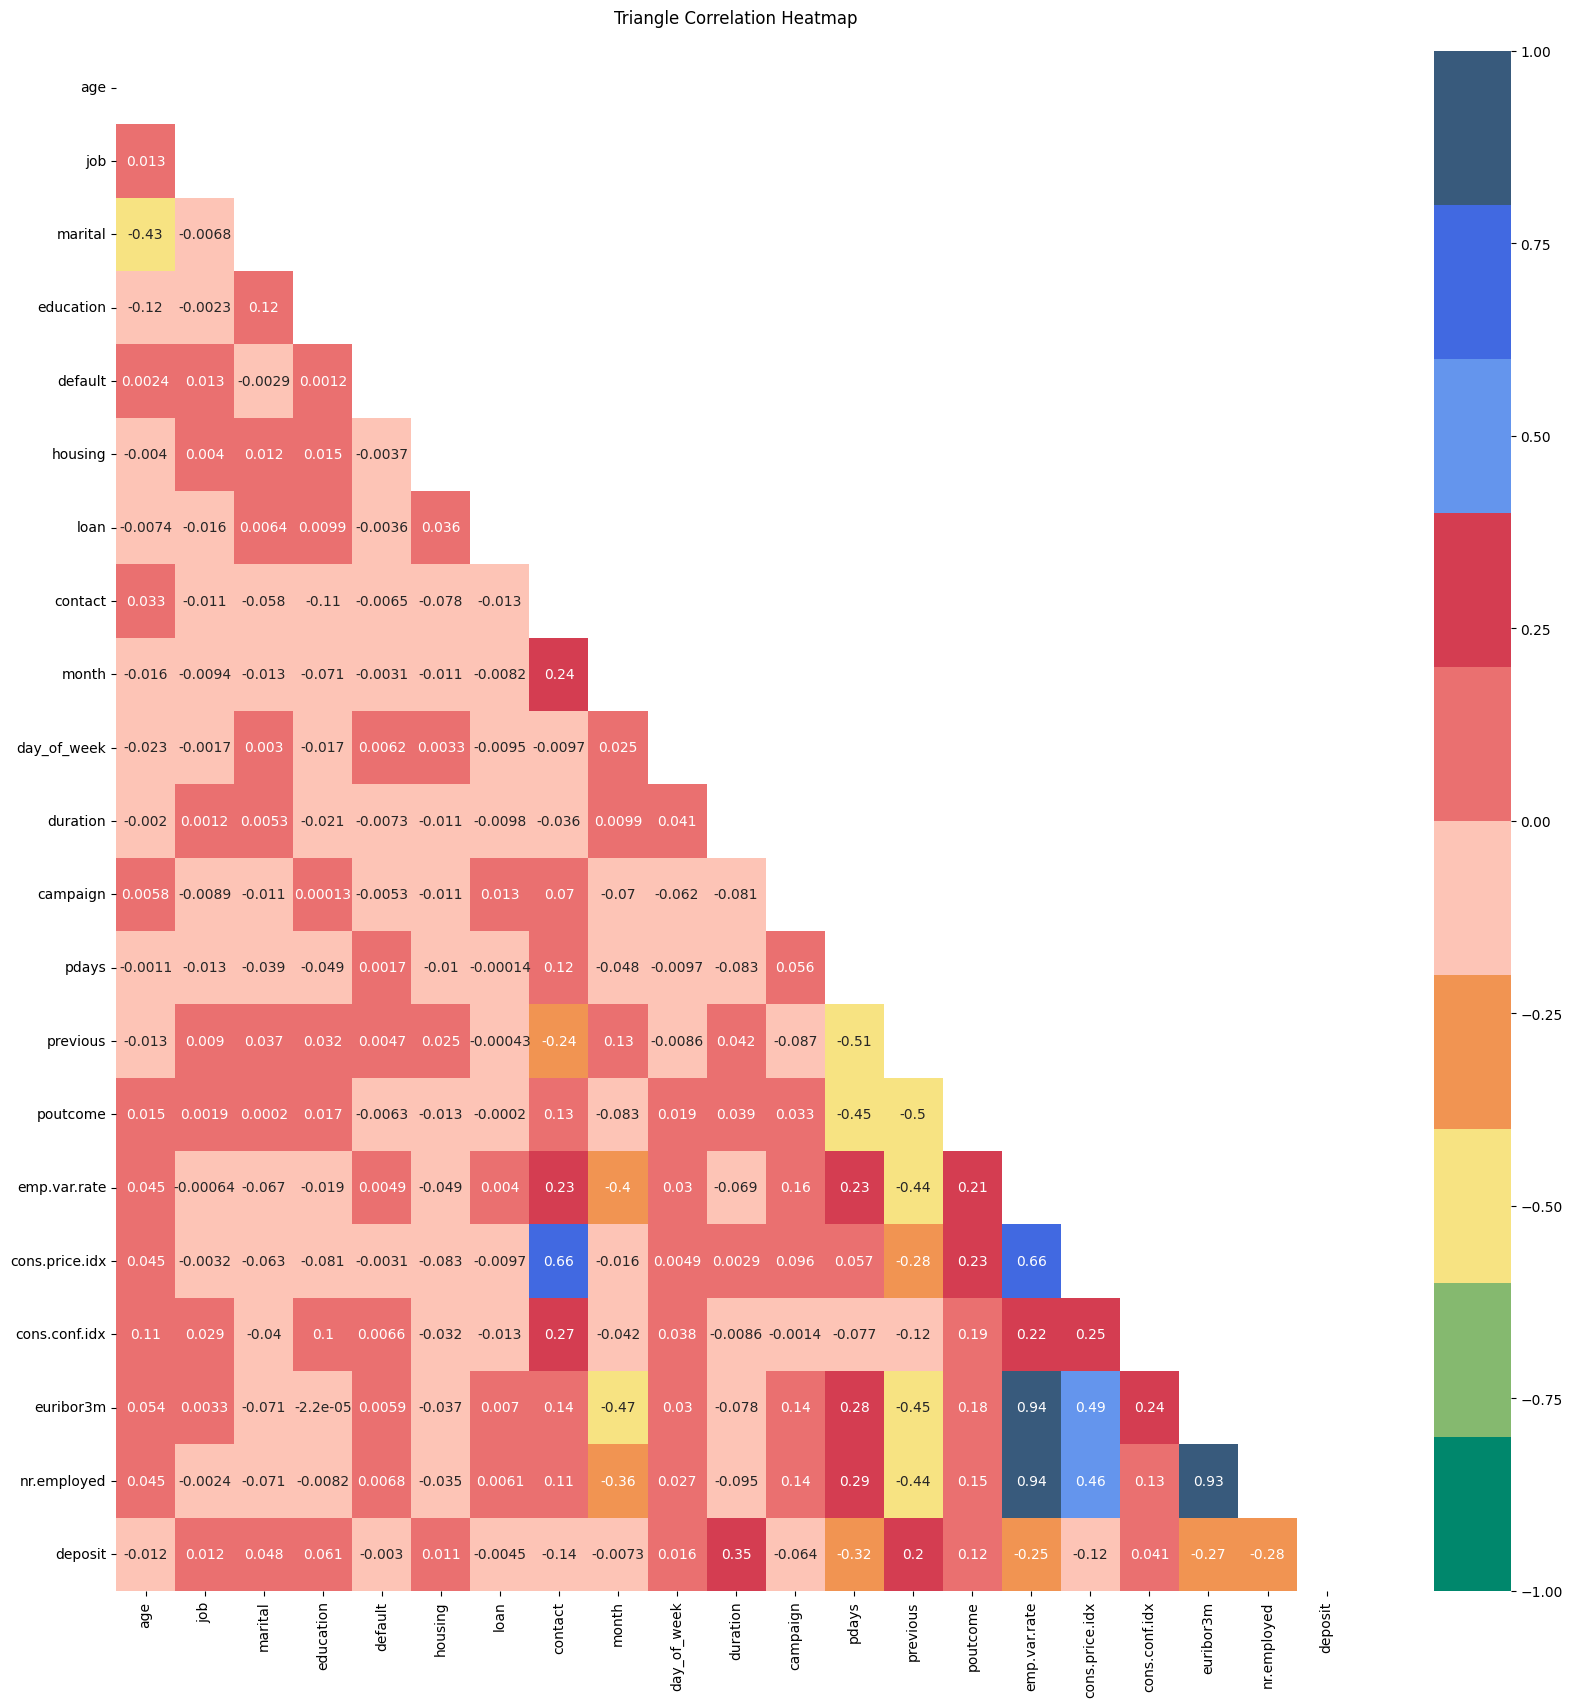

In [24]:
eda.find_corr_heatmap(df)

### Models

In [25]:
from machine_learning_models import MLModels

models = MLModels()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.loc[:,['age', 'job', 'marital', 'education','housing', 'loan', 'month', 'day_of_week', 'duration',
              'campaign', 'poutcome','emp.var.rate', 'cons.price.idx','cons.conf.idx']]
y = df['deposit']


x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

#Decission Tree
dt_bagging = BaggingClassifier(estimator = DecisionTreeClassifier(criterion='gini'),n_estimators = 150,random_state=0)
dt_bagging.fit(X_train,y_train)

result_reports = models.calculate_classifier_metrics(dt_bagging,'DT_Bagging',X_train,X_test,y_train,y_test)


In [28]:
# Her bir key için yeni bir liste ekleyerek mevcut dictionary'yi güncelleme
def updated_dic(existing_dict,new_dict):
    for key, value in new_dict.items():
        existing_dict[key].extend(value)

In [29]:
#Random Forest Classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200,criterion='gini')
rfc.fit(X_train,y_train)

updated_dic(result_reports,models.calculate_classifier_metrics(rfc,'Random_Forest',X_train,X_test,y_train,y_test))


In [30]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=20,weights='distance',metric='minkowski')
knn.fit(X_train,y_train)

updated_dic(result_reports, models.calculate_classifier_metrics(knn,'KNeighbors',X_train,X_test,y_train,y_test))


In [31]:
#SVC kernel='rbf'
from sklearn.svm import SVC

svc_rbf = SVC(kernel='rbf',probability=True)
svc_rbf.fit(X_train,y_train)

updated_dic(result_reports, models.calculate_classifier_metrics(svc_rbf,'SVC-rbf',X_train,X_test,y_train,y_test))


In [32]:
#SVC kernel='sigmoid'
from sklearn.svm import SVC

svc_sg = SVC(kernel='sigmoid', probability=True)
svc_sg.fit(X_train,y_train)

updated_dic(result_reports,models.calculate_classifier_metrics(svc_sg,'SVC-sigmoid',X_train,X_test,y_train,y_test))

In [33]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

updated_dic(result_reports,models.calculate_classifier_metrics(logr,'Logistic_Regression',X_train,X_test,y_train,y_test))


In [34]:
#GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)

updated_dic(result_reports,models.calculate_classifier_metrics(gbk,'Gradient_Boosting',X_train,X_test,y_train,y_test))


In [35]:
#XGBClassifier

from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

updated_dic(result_reports,models.calculate_classifier_metrics(xgb,'XGBC',X_train,X_test,y_train,y_test))


In [36]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)

updated_dic(result_reports,models.calculate_classifier_metrics(gnb,'GaussianNB',X_train,X_test,y_train,y_test))

In [37]:
import csv
# Sözlüğü CSV dosyasına yazma
with open('result_reports.csv', 'w', newline='') as csv_dosya:
    yazici = csv.DictWriter(csv_dosya, fieldnames=result_reports.keys())

    # Başlık satırını yazma
    yazici.writeheader()

    # Sözlüğü CSV dosyasına yazma
    yazici.writerow(result_reports)

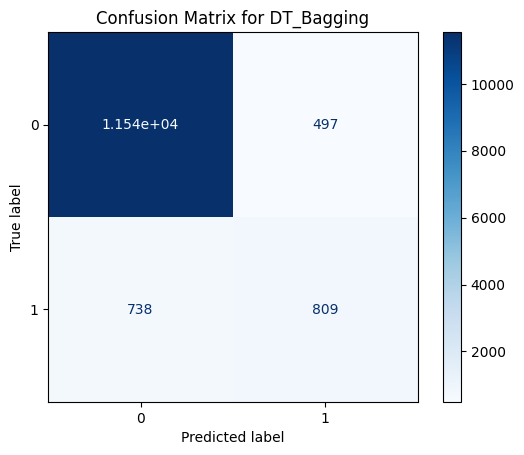

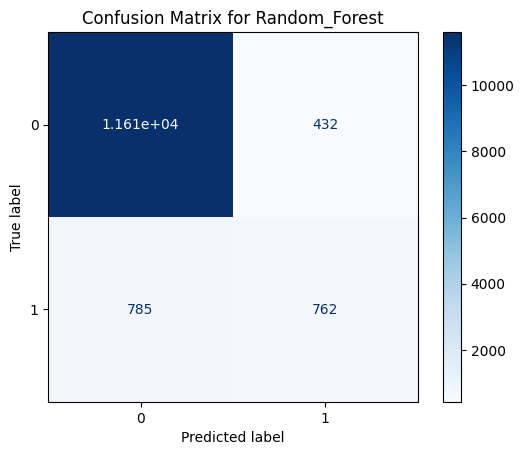

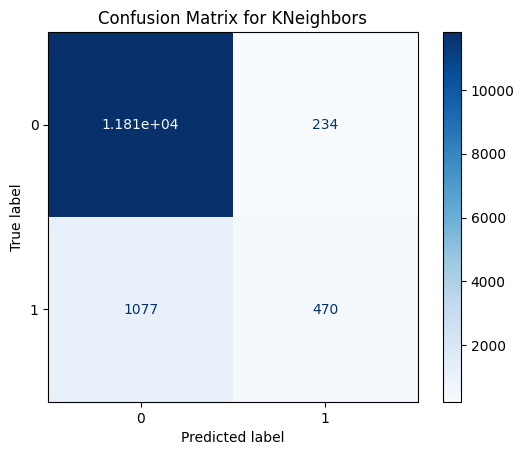

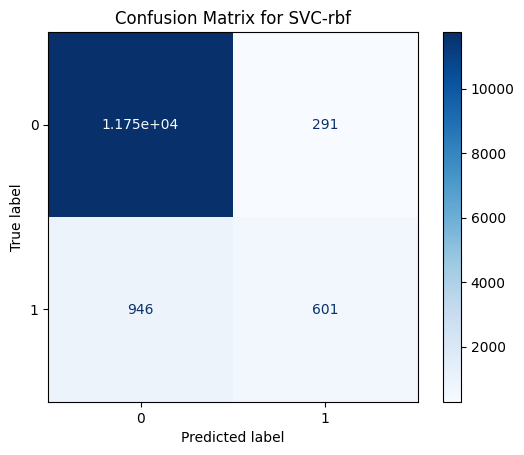

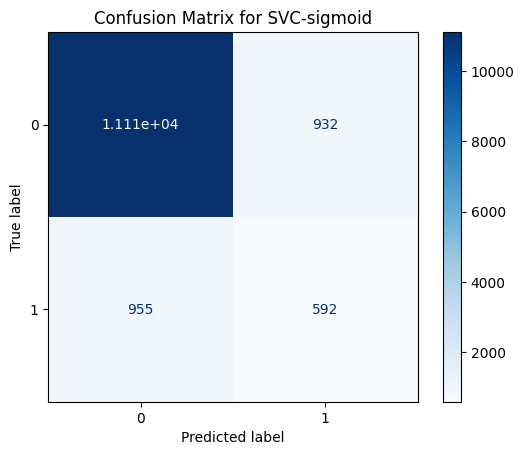

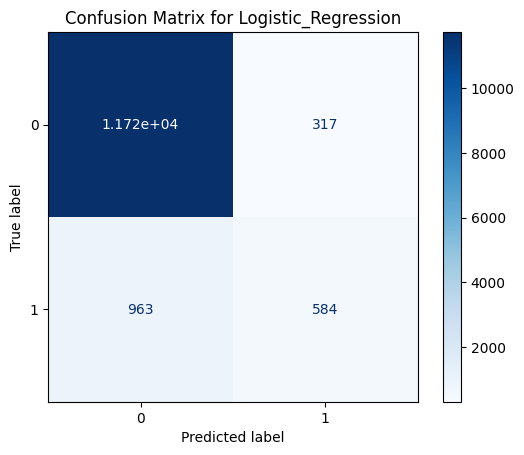

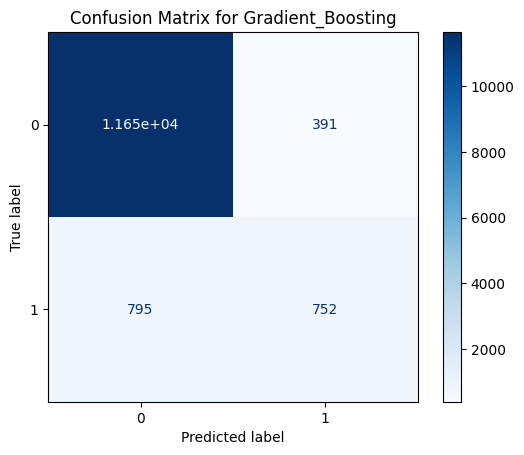

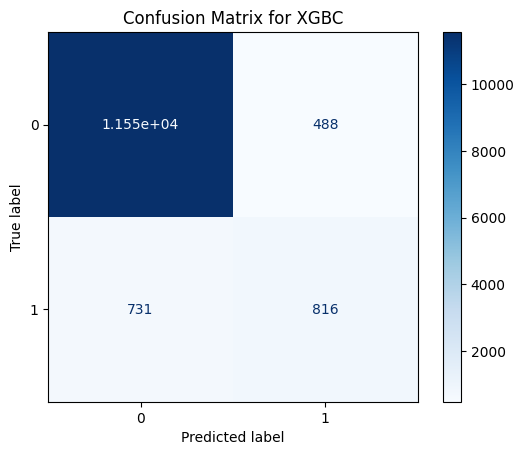

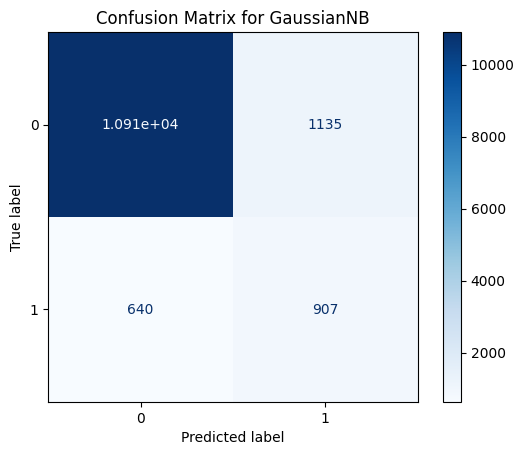

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

for i in range(len(result_reports['classifier_name'])):
    name = result_reports['classifier_name'][i]
    cm = result_reports['cm'][i]

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap ='Blues',values_format='.4g')
    plt.title(f'Confusion Matrix for {name}')
plt.show()
    

In [39]:
for i in range(len(result_reports['classifier_name'])):
    
    print(f' {result_reports["classifier_name"][i]} \n accuracy value : {result_reports["accuracy"][i]: .3f}  precision : {result_reports["precision"][i]: .3f}  recall: {result_reports["recall"][i]: .3f}  f1_score : {result_reports["f1"][i]: .3f} ')
    print("-----")

 DT_Bagging 
 accuracy value :  0.909  precision :  0.619  recall:  0.523  f1_score :  0.567 
-----
 Random_Forest 
 accuracy value :  0.910  precision :  0.638  recall:  0.493  f1_score :  0.556 
-----
 KNeighbors 
 accuracy value :  0.904  precision :  0.668  recall:  0.304  f1_score :  0.418 
-----
 SVC-rbf 
 accuracy value :  0.909  precision :  0.674  recall:  0.388  f1_score :  0.493 
-----
 SVC-sigmoid 
 accuracy value :  0.861  precision :  0.388  recall:  0.383  f1_score :  0.386 
-----
 Logistic_Regression 
 accuracy value :  0.906  precision :  0.648  recall:  0.378  f1_score :  0.477 
-----
 Gradient_Boosting 
 accuracy value :  0.913  precision :  0.658  recall:  0.486  f1_score :  0.559 
-----
 XGBC 
 accuracy value :  0.910  precision :  0.626  recall:  0.527  f1_score :  0.572 
-----
 GaussianNB 
 accuracy value :  0.869  precision :  0.444  recall:  0.586  f1_score :  0.505 
-----


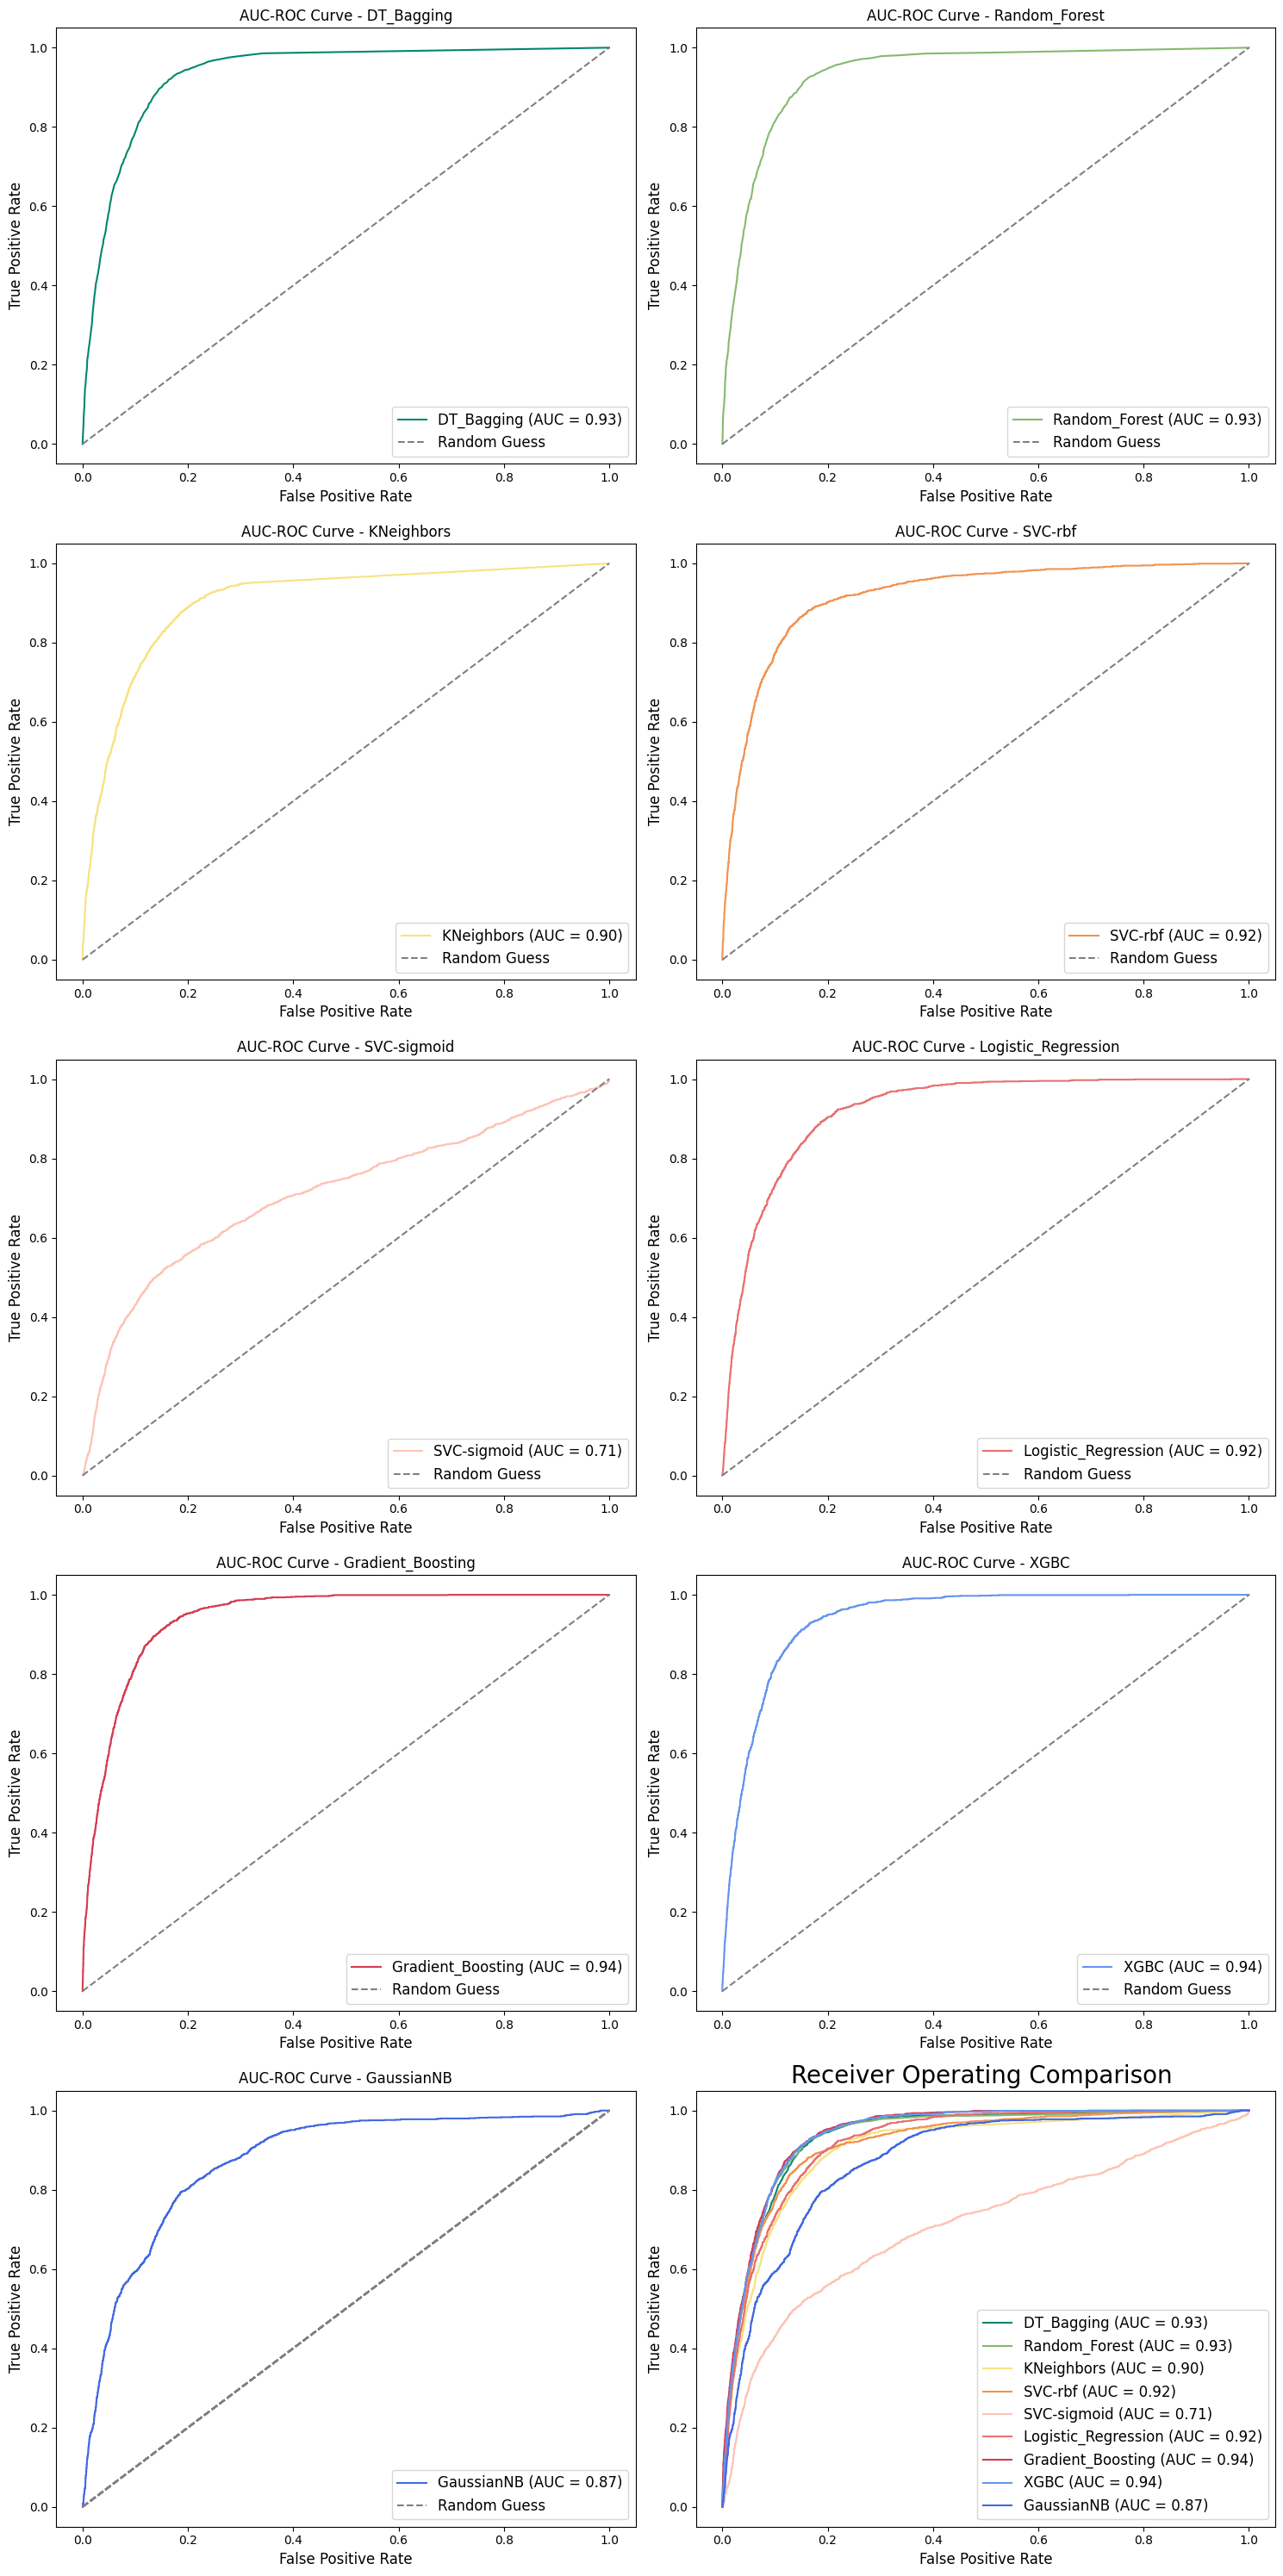

In [40]:
my_colormap = ['#00876c', '#85b96f', '#f7e382', '#f19452', '#fdc4b6', '#ea7070', '#d43d51', '#6495ED', '#4169E1', '#385a7c']

# Figure oluşturma
fig, axs = plt.subplots(len(result_reports['classifier_name']) // 2 + 1, 2, figsize=(15, 30))

# Her bir sınıflandırıcı için AUC-ROC eğrisini çizme
for i in range(len(result_reports['classifier_name'])):
    ax = axs[i // 2, i % 2]
    fpr = result_reports['fpr'][i]
    tpr = result_reports['tpr'][i]
    roc_auc = result_reports['roc_auc'][i]

    # AUC-ROC 
    ax.plot(fpr, tpr, label=f'{result_reports["classifier_name"][i]} (AUC = {roc_auc:.2f})', color=my_colormap[i % len(my_colormap)])
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate',fontsize=12)
    ax.set_title(f'AUC-ROC Curve - {result_reports["classifier_name"][i]}')
    ax.legend(loc = 'lower right', prop={'size': 12})

axlast = axs[4, 1]
for i in range(len(result_reports['classifier_name'])):
    
    fpr = result_reports['fpr'][i]
    tpr = result_reports['tpr'][i]
    roc_auc = result_reports['roc_auc'][i]
    #ALL PLOTS ----------------------------------
    axlast.plot(fpr, tpr, label=f'{result_reports["classifier_name"][i]} (AUC = {roc_auc:.2f})', color=my_colormap[i % len(my_colormap)])
    ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
axlast.set_title('Receiver Operating Comparison ',fontsize=20)
axlast.set_ylabel('True Positive Rate',fontsize=12)
axlast.set_xlabel('False Positive Rate',fontsize=12)
axlast.legend(loc = 'lower right', prop={'size': 12})

# Subplot'ları düzenleme
plt.tight_layout()
plt.show()

